In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# mpl.rc("font", family="Malgun Gothic")
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [347]:
df = pd.read_csv("Cleaned_Students_Performance.csv")
numeric_df = df.select_dtypes(["float64", "int64"])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   1000 non-null   int64  
 1   lunch                    1000 non-null   int64  
 2   test_preparation_course  1000 non-null   int64  
 3   math_score               1000 non-null   int64  
 4   reading_score            1000 non-null   int64  
 5   writing_score            1000 non-null   int64  
 6   total_score              1000 non-null   int64  
 7   average_score            1000 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [348]:
korean_df = pd.read_csv("Cleaned_Students_Performance (korean).csv", encoding="cp949")
korean_df

,성별,인종,부모의 최종학력,급식비 지원,시험 준비여부,수학,읽기,쓰기,총점,평균
0,여자,인종B,학사,1,0,72,72,74,218,72.666667
1,여자,인종C,대학교 재학,1,1,69,90,88,247,82.333333
2,여자,인종B,석사,1,0,90,95,93,278,92.666667
3,남자,인종A,전문대학 졸업,0,0,47,57,44,148,49.333333
4,남자,인종C,대학교 재학,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,여자,인종E,석사,1,1,88,99,95,282,94.000000
996,남자,인종C,고등학교 졸업,0,0,62,55,55,172,57.333333
997,여자,인종C,고등학교 졸업,0,1,59,71,65,195,65.000000
998,여자,인종D,대학교 재학,1,1,68,78,77,223,74.333333


In [403]:
k_df = pd.read_csv("Cleaned_Students_Performance (2).csv", encoding="cp949")
k_df

,성별,인종,부모의 최종학력,급식비 지원,시험 준비여부,수학,읽기,쓰기,총점,평균
0,여자,인종B,학사,1,N,72,72,74,218,72.666667
1,여자,인종C,대학교 재학,1,Y,69,90,88,247,82.333333
2,여자,인종B,석사,1,N,90,95,93,278,92.666667
3,남자,인종A,전문대학 졸업,0,N,47,57,44,148,49.333333
4,남자,인종C,대학교 재학,1,N,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,여자,인종E,석사,1,Y,88,99,95,282,94.000000
996,남자,인종C,고등학교 졸업,0,N,62,55,55,172,57.333333
997,여자,인종C,고등학교 졸업,0,Y,59,71,65,195,65.000000
998,여자,인종D,대학교 재학,1,Y,68,78,77,223,74.333333


In [349]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


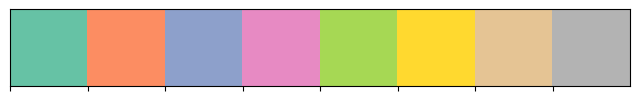

In [350]:
palette = sns.color_palette("Set2")
sns.palplot(palette)
sns.set_palette("Set2")

In [351]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64

In [352]:
# 인종 x 성별
# 인종 x 부모 교육 수준
# 인종 x 점심 제공

# e 그룹 인종의 종합, 평균 스코어가 제일 높다
df.groupby("race_ethnicity")["average_score"].mean()

race_ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: average_score, dtype: float64

In [353]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


In [354]:
new_df = df.copy()
new_df["gender"] = df["gender"].map({0: "Female", 1: "Male"})
# new_df["parental_level_of_education"] = df["parental_level_of_education"].map(
#     {
#         3: "associate's degree",
#         4: "bachelor's degree",
#         1: "high school",
#         5: "master's degree",
#         2: "some college",
#         0: "some high school",
#     }
# )
# new_df["race_ethnicity"] = df["race_ethnicity"].map(
#     {0: "group A", 1: "group B", 2: "group C", 3: "group D", 4: "group E"}
# )

In [355]:
new_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,Female,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,Female,group C,some college,1,1,69,90,88,247,82.333333
2,Female,group B,master's degree,1,0,90,95,93,278,92.666667
3,Male,group A,associate's degree,0,0,47,57,44,148,49.333333
4,Male,group C,some college,1,0,76,78,75,229,76.333333


In [356]:
# 남성보다 여성의 성적이 더 높다
# 가설 : 인종별로도 남성보다 여성의 성적이 더 높을 것이다
result = df.groupby(["gender", "race_ethnicity"])["average_score"].mean()
result

gender  race_ethnicity
0       group A           65.129630
        group B           67.509615
        group C           68.585185
        group D           71.439276
        group E           74.062802
1       group A           61.540881
        group B           63.000000
        group C           65.249400
        group D           66.987469
        group E           71.478873
Name: average_score, dtype: float64

<Axes: xlabel='race_ethnicity', ylabel='average_score'>

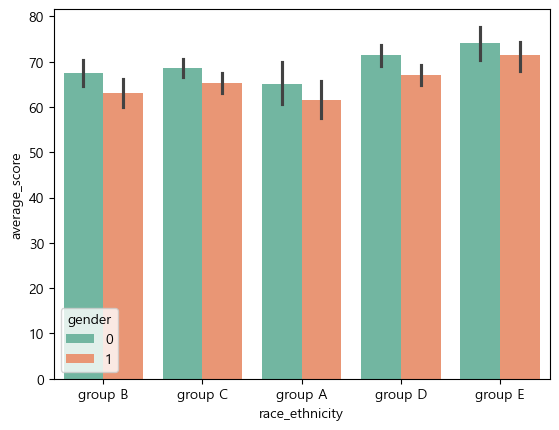

In [357]:
sns.barplot(
    data=df, x="race_ethnicity", y="average_score", hue="gender", estimator="mean"
)

In [358]:
# e 그룹 인종의 종합, 평균 스코어가 제일 높다
df.groupby("gender")["average_score"].mean()

gender
0    69.569498
1    65.837483
Name: average_score, dtype: float64

In [359]:
df.groupby("test_preparation_course")["average_score"].mean()

test_preparation_course
0    65.038941
1    72.669460
Name: average_score, dtype: float64

In [360]:
df.groupby("test_preparation_course")["average_score"].mean()

test_preparation_course
0    65.038941
1    72.669460
Name: average_score, dtype: float64

In [361]:
df.groupby(["parental_level_of_education", "lunch", "test_preparation_course"])[
    "average_score"
].mean()

parental_level_of_education  lunch  test_preparation_course
associate's degree           0      0                          61.638889
                                    1                          71.701149
                             1      0                          68.920290
                                    1                          76.710692
bachelor's degree            0      0                          63.876543
                                    1                          72.098039
                             1      0                          72.340741
                                    1                          78.666667
high school                  0      0                          54.094203
                                    1                          63.666667
                             1      0                          65.198582
                                    1                          69.437500
master's degree              0      0                          6

In [362]:
# 부모의 학력 & 점심을 지원 받는 요소에 따른 평균 성적
df.groupby(["parental_level_of_education", "lunch"])["average_score"].mean()

parental_level_of_education  lunch
associate's degree           0        65.428571
                             1        71.767816
bachelor's degree            0        67.053030
                             1        74.819820
high school                  0        57.376190
                             1        66.275132
master's degree              0        67.111111
                             1        78.047619
some college                 0        62.970464
                             1        71.435374
some high school             0        57.224044
                             1        69.183616
Name: average_score, dtype: float64

<Axes: xlabel='lunch', ylabel='average_score'>

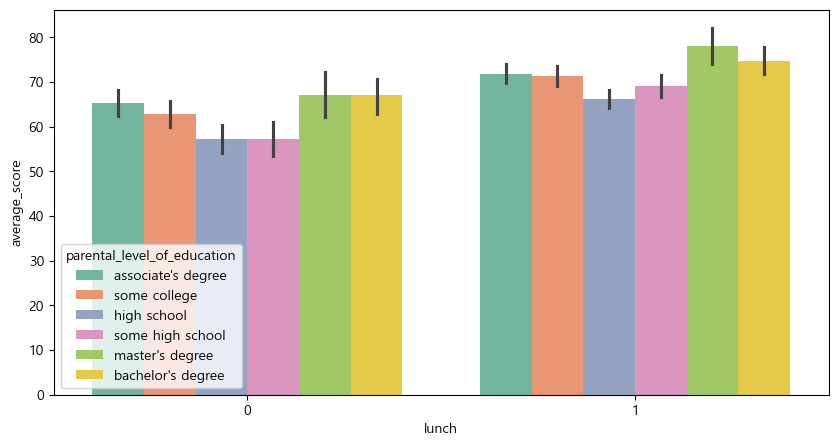

In [363]:
# 부모의 학력 & 점심을 지원 받는 요소에 따른 평균 성적
plt.figure(figsize=[10, 5])
sns.barplot(
    data=new_df,
    x="lunch",
    y="average_score",
    hue="parental_level_of_education",
    estimator="mean",
)


# 부모의 학력이 낮은 2개 구간 제외, 나머지 부모의 학력이 높은 만큼 성적에 영향

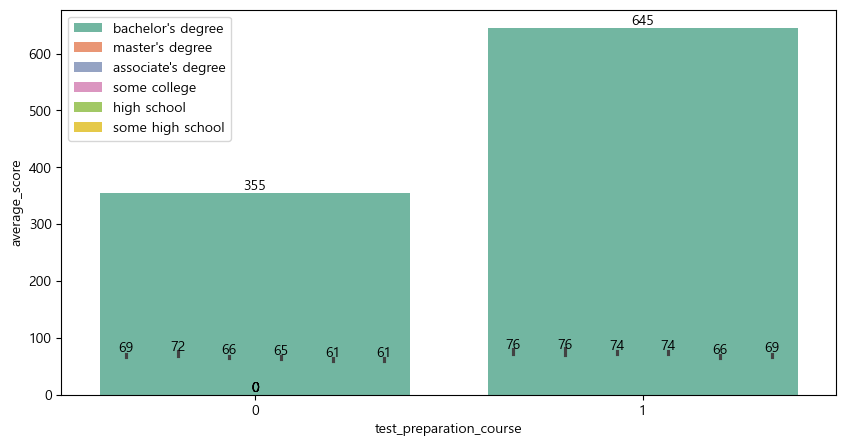

In [364]:
# 부모의 학력 & 시험 준비를 하는 인원에 따른 평균 성적
plt.figure(figsize=[10, 5])
sns.barplot(
    data=new_df,
    x="test_preparation_course",
    y="average_score",
    hue="parental_level_of_education",
    estimator="mean",
)

ax = sns.countplot(data=new_df, x="lunch")

# 막대 위에 숫자 표시
for bar in ax.patches:
    count = int(bar.get_height())  # 막대의 높이 = 개수
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x 좌표: 막대 중앙
        count + 0.5,  # y 좌표: 막대 위 약간 위
        str(count),  # 텍스트로 개수 표시
        ha="center",  # 텍스트 정렬
        va="bottom",  # 텍스트 정렬
    )

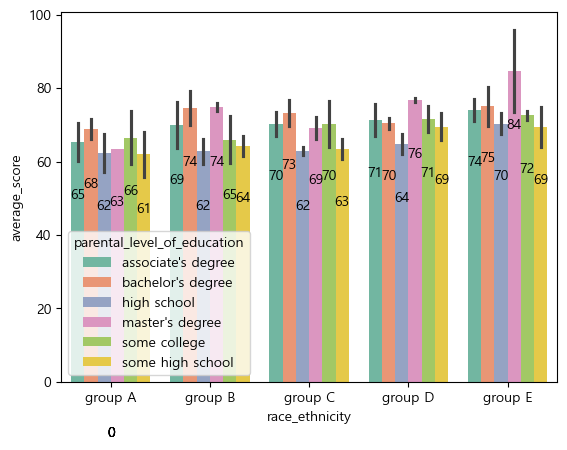

In [365]:
# [사회/문화적 요인]의 최종 그래프
res = (
    new_df.groupby(
        ["test_preparation_course", "parental_level_of_education", "race_ethnicity"]
    )["average_score"]
    .mean()
    .reset_index()
)

sns.set_palette("Set2")
grh = sns.barplot(
    data=res,
    x="race_ethnicity",
    # x="parental_level_of_education",
    y="average_score",
    hue="parental_level_of_education",
)
# sns.move_legend(grh, "lower right")

# 막대 위에 숫자 표시
for bar in grh.patches:
    count = int(bar.get_height())  # 막대의 높이 = 개수
    grh.text(
        bar.get_x() + bar.get_width() / 2,  # x 좌표: 막대 중앙
        count - 15,  # y 좌표: 막대 위 약간 위
        str(count),  # 텍스트로 개수 표시
        ha="center",  # 텍스트 정렬
        # va="bottom",  # 텍스트 정렬
    )

plt.show()

In [366]:
new_df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64

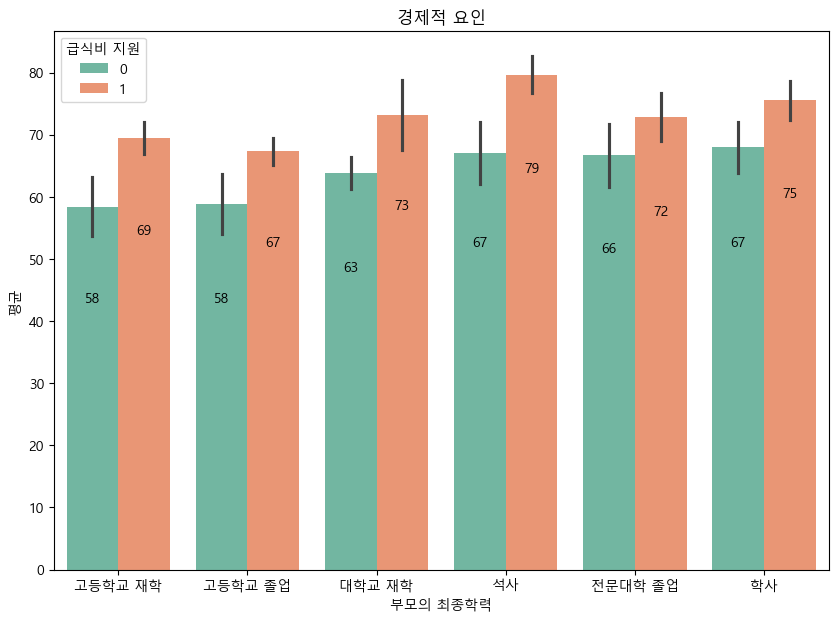

In [367]:
# [경제적 요인]의 최종 그래프

plt.figure(figsize=[10, 7])
group = (
    korean_df.groupby(["부모의 최종학력", "급식비 지원", "시험 준비여부"])["평균"]
    .mean()
    .reset_index()
)
# grid = sns.barplot(data=group, x="부모의 최종학력", y="평균", hue="급식비 지원")


sns.set_palette("Set2")
grh = sns.barplot(
    data=group,
    x="부모의 최종학력",
    # x="parental_level_of_education",
    y="평균",
    hue="급식비 지원",
)
# sns.move_legend(grh, "lower right")

# 막대 위에 숫자 표시
for bar in grh.patches:
    count = int(bar.get_height())
    if str(count) == "0":
        continue  # 막대의 높이 = 개수
    grh.text(
        bar.get_x() + bar.get_width() / 2,  # x 좌표: 막대 중앙
        count - 15,  # y 좌표: 막대 위 약간 위
        str(count),  # 텍스트로 개수 표시
        ha="center",  # 텍스트 정렬
        # va="bottom",  # 텍스트 정렬
    )

plt.title("경제적 요인")
# plt.xticks(rotation=45)
plt.show()

In [335]:
korean_df.head()

,성별,인종,부모의 최종학력,급식비 지원,시험 준비여부,수학,읽기,쓰기,총점,평균
0,여자,인종B,학사,1,0,72,72,74,218,72.666667
1,여자,인종C,대학교 재학,1,1,69,90,88,247,82.333333
2,여자,인종B,석사,1,0,90,95,93,278,92.666667
3,남자,인종A,전문대학 졸업,0,0,47,57,44,148,49.333333
4,남자,인종C,대학교 재학,1,0,76,78,75,229,76.333333


In [345]:
korean_df.groupby("시험 준비여부")["수학"].mean()

시험 준비여부
0    64.077882
1    69.695531
Name: 수학, dtype: float64

In [369]:
korean_df.groupby("시험 준비여부")["수학"].max()


시험 준비여부
0    100
1    100
Name: 수학, dtype: int64

In [370]:
korean_df.groupby("시험 준비여부")["수학"].min()


시험 준비여부
0     0
1    23
Name: 수학, dtype: int64

In [371]:
korean_df.groupby("시험 준비여부")["읽기"].mean()


시험 준비여부
0    66.534268
1    73.893855
Name: 읽기, dtype: float64

In [372]:
korean_df.groupby("시험 준비여부")["읽기"].max()


시험 준비여부
0    100
1    100
Name: 읽기, dtype: int64

In [373]:
korean_df.groupby("시험 준비여부")["읽기"].min()


시험 준비여부
0    17
1    37
Name: 읽기, dtype: int64

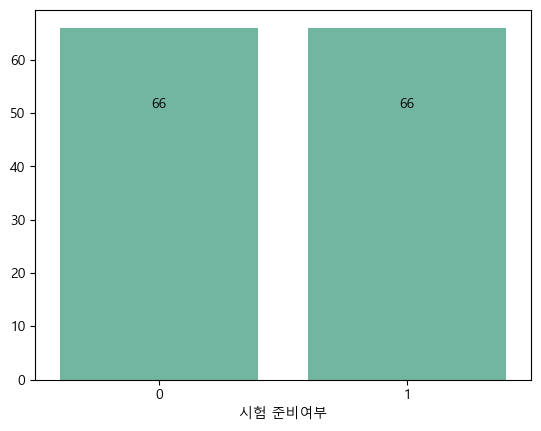

In [ ]:
grh=sns.barplot(
    x=korean_df["시험 준비여부"],
    y=korean_df["수학"].mean()
)
for bar in grh.patches:
    count = int(bar.get_height())
    if str(count) == "0":
        continue  # 막대의 높이 = 개수
    grh.text(
        bar.get_x() + bar.get_width() / 2,  # x 좌표: 막대 중앙
        count - 15,  # y 좌표: 막대 위 약간 위
        str(count),  # 텍스트로 개수 표시
        ha="center",  # 텍스트 정렬
        # va="bottom",  # 텍스트 정렬
    )

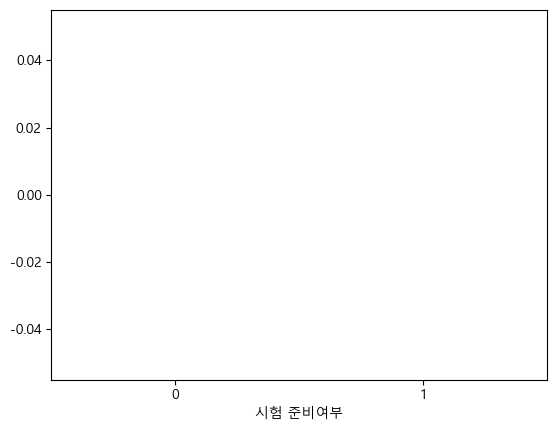

In [382]:
grh=sns.barplot(
    x=korean_df["시험 준비여부"],
    y=korean_df["수학"].min()
)
for bar in grh.patches:
    count = int(bar.get_height())
    if str(count) == "0":
        continue  # 막대의 높이 = 개수
    grh.text(
        bar.get_x() + bar.get_width() / 2,  # x 좌표: 막대 중앙
        count - 15,  # y 좌표: 막대 위 약간 위
        str(count),  # 텍스트로 개수 표시
        ha="center",  # 텍스트 정렬
        # va="bottom",  # 텍스트 정렬
    )

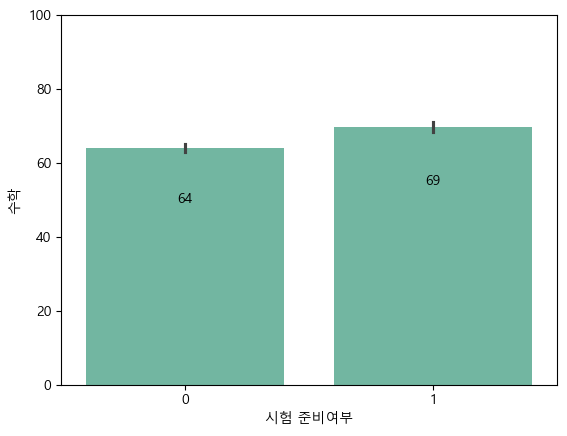

In [399]:
plt.ylim([0, 100])
grh=sns.barplot(
    x=korean_df["시험 준비여부"],
    y=korean_df["수학"]
)
for bar in grh.patches:
    count = int(bar.get_height())
    if str(count) == "0":
        continue  # 막대의 높이 = 개수
    grh.text(
        bar.get_x() + bar.get_width() / 2,  # x 좌표: 막대 중앙
        count - 15,  # y 좌표: 막대 위 약간 위
        str(count),  # 텍스트로 개수 표시
        ha="center",  # 텍스트 정렬
        # va="bottom",  # 텍스트 정렬
    )

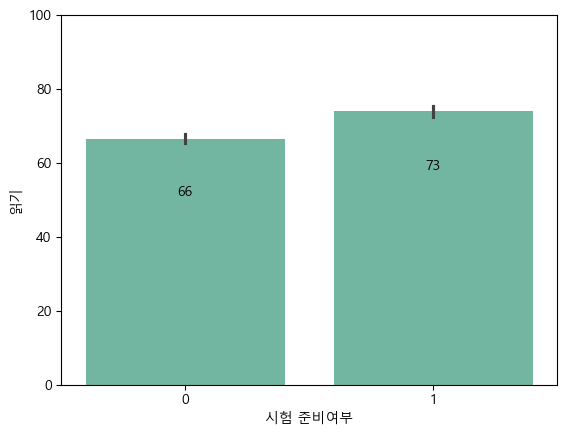

In [400]:
plt.ylim([0, 100])

grh=sns.barplot(
    x=korean_df["시험 준비여부"],
    y=korean_df["읽기"]
)
for bar in grh.patches:
    count = int(bar.get_height())
    if str(count) == "0":
        continue  # 막대의 높이 = 개수
    grh.text(
        bar.get_x() + bar.get_width() / 2,  # x 좌표: 막대 중앙
        count - 15,  # y 좌표: 막대 위 약간 위
        str(count),  # 텍스트로 개수 표시
        ha="center",  # 텍스트 정렬
        # va="bottom",  # 텍스트 정렬
    )

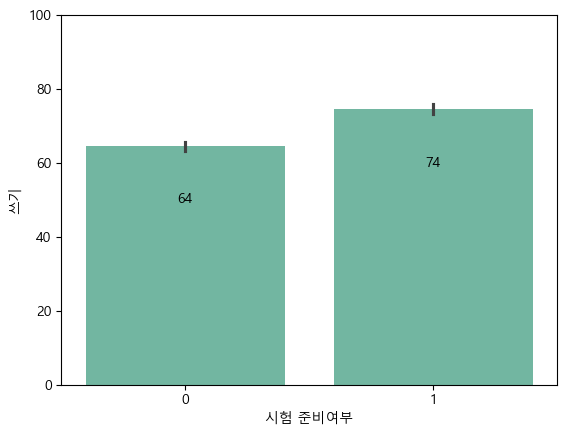

In [401]:
plt.ylim([0, 100])

grh=sns.barplot(
    x=korean_df["시험 준비여부"],
    y=korean_df["쓰기"]
)
for bar in grh.patches:
    count = int(bar.get_height())
    if str(count) == "0":
        continue  # 막대의 높이 = 개수
    grh.text(
        bar.get_x() + bar.get_width() / 2,  # x 좌표: 막대 중앙
        count - 15,  # y 좌표: 막대 위 약간 위
        str(count),  # 텍스트로 개수 표시
        ha="center",  # 텍스트 정렬
        # va="bottom",  # 텍스트 정렬
    )

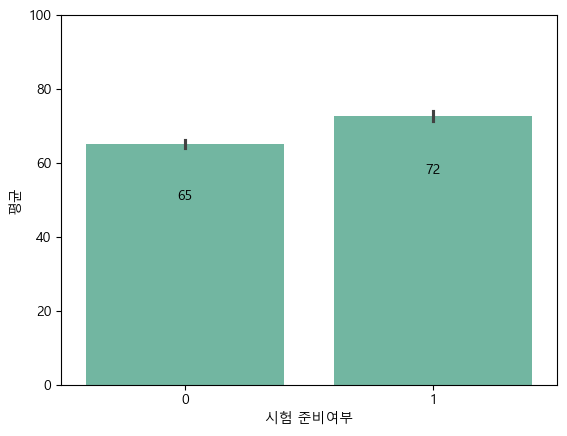

In [402]:
plt.ylim([0, 100])

grh=sns.barplot(
    x=korean_df["시험 준비여부"],
    y=korean_df["평균"]
)
for bar in grh.patches:
    count = int(bar.get_height())
    if str(count) == "0":
        continue  # 막대의 높이 = 개수
    grh.text(
        bar.get_x() + bar.get_width() / 2,  # x 좌표: 막대 중앙
        count - 15,  # y 좌표: 막대 위 약간 위
        str(count),  # 텍스트로 개수 표시
        ha="center",  # 텍스트 정렬
        # va="bottom",  # 텍스트 정렬
    )

In [ ]:
plt.figure(figsize=[8, 6])

grh = sns.barplot(
    data= df, x=df["부모의 최종학력"], 
    y=df["평균"],
    hue="부모의 최종학력",
    order=["고등학교 재학","고등학교 졸업","대학교 재학","전문대학 졸업","석사","학사"]
)

plt.title("경제성 요인의 평균 점수 비교")
plt.ylim([0, 100])
plt.show()

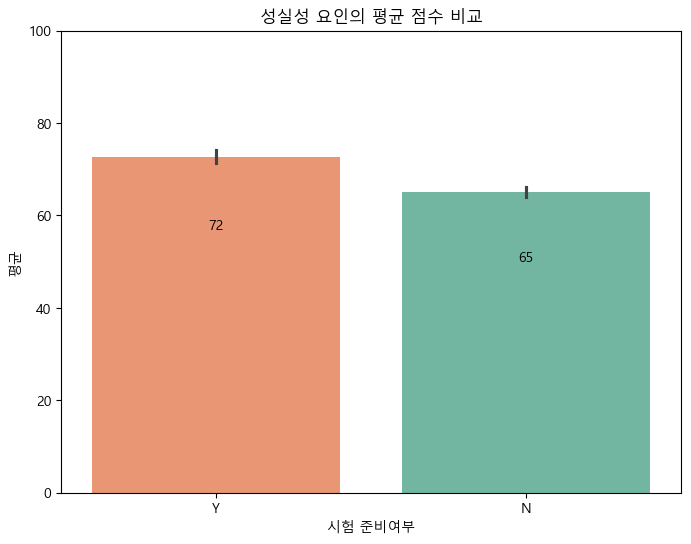

In [433]:
plt.figure(figsize=[8, 6])
plt.title("성실성 요인의 평균 점수 비교")
plt.ylim([0, 100])
sns.set_palette("Set2")

grh=sns.barplot(
    x=k_df["시험 준비여부"],
    y=k_df["평균"],
    hue=k_df["시험 준비여부"],
    order=["Y","N"],
)
for bar in grh.patches:
    count = int(bar.get_height())
    if str(count) == "0":
        continue  # 막대의 높이 = 개수
    grh.text(
        bar.get_x() + bar.get_width() / 2,  # x 좌표: 막대 중앙
        count - 15,  # y 좌표: 막대 위 약간 위
        str(count),  # 텍스트로 개수 표시
        ha="center",  # 텍스트 정렬
        # va="bottom",  # 텍스트 정렬
    )
plt.show()
